<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Parte 5. Redes Neuronales Convolucionales</font></h1>

<h1><font color="#113D68" size=4>4. Reconocimiento de objetos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. Conjunto de datos](#section1)
    * [1.1. 1.1. Cargar el dataset CIFAR-10](#section1.1)
* [2. CNN de línea base](#section2)
    * [2.1. Librería y dataset](#section2.1)
    * [2.2. Normalización](#section2.2)
    * [2.3. One-Hot Encoding](#section2.3)
    * [2.4. Desarrollar CNN de linea base](#section2.4)
    * [2.5. Evaluación del modelo](#section2.5)
* [3. CNN más profunda](#section3)
* [4. Rendimiento del modelo](#section4)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

En esta lección, descubrirá cómo desarrollar y evaluar modelos de Deep Learning para el reconocimiento de objetos en Keras. Después de completar este tutorial paso a paso, sabrá:
* Trabajar con el dataset CIFAR-10.
* Crear una CNN de linea base para el reconocimiento de objetos.
* Mejorar el rendimiento mediante CNN más profundas.

In [ ]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. Conjunto de datos</font>

El Instituto Canadiense de Investigación Avanzada (CIFAR, por sus siglas en inglés) desarrolló un conjunto de datos estándar de visión artificial y Deep Learning para este problema.

El conjunto de datos CIFAR-10 consta de 60.000 fotos divididas en 10 clases. Las clases incluyen objetos comunes como aviones, automóviles, pájaros, gatos, etc. El conjunto de datos se divide en 50.000 imágenes para train y 10.000 para test. Las fotos son en color con canales rojo, verde y azul, por lo que tienen un tamaño de $32 × 32 × 3$ píxeles.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información sobre el dataset [CIFAR](http://www.cs.toronto.edu/~kriz/cifar.html)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información sobre la página de Rodrigo Beneson y sus resultados sobre el dataset [CIFAR](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)


<a id="section1.1"></a>
# <font color="#004D7F" size=5>1.1. Cargar el dataset CIFAR-10</font>

El conjunto de datos CIFAR-10 se puede cargar fácilmente en Keras. Keras tiene la posibilidad de descargar automáticamente conjuntos de datos estándar como CIFAR-10 y almacenarlos en el directorio `~/.keras/datasets` usando la función `cifar10.load_data()`. 

Este conjunto de datos tiene un tamaño de 163 megabytes, por lo que la descarga puede demorar unos minutos. Una vez descargado, las llamadas posteriores a la función cargarán el conjunto de datos. El conjunto de datos se almacena como conjuntos Pickle de train/test, listos para usar en Keras. Cada imagen se representa como una matriz tridimensional, con dimensiones de rojo, verde, azul, ancho y alto. Podemos trazar imágenes directamente usando la biblioteca de trazado Matplotlib Python.

170508288/170498071 [==============================] - 2s 0us/step


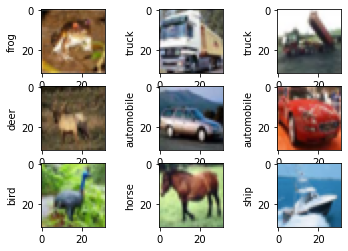

In [ ]:
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.ylabel(names[ y_train[i][0] ])
    plt.imshow(X_train[i])
# show the plot
plt.show()

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. CNN de línea base</font>

El problema de CIFAR-10 se resuelve mejor utilizando una red neuronal convolucional (CNN). 

<a id="section2.1"></a>
# <font color="#004D7F" size=5>2.1. Librería y dataset</font>

Podemos comenzar rápidamente importando todas las clases, funciones y el dataset que necesitaremos en este ejemplo.

In [ ]:
# Simple CNN model for the CIFAR-10 Dataset
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

<a id="section2.2"></a>
# <font color="#004D7F" size=5>2.2. Normalización</font>

Los valores de píxeles están en el rango de 0 a 255 para cada uno de los canales rojo, verde y azul por o que es una buena práctica normalizarlos. 

In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
X_train= X_train.astype(float)
X_test= X_test.astype(float)

X_train= X_train/255
X_test= X_test/255

<a id="section2.3"></a>
# <font color="#004D7F" size=5>2.3. One-Hot Encoding</font>

Las variables de salida se definen como un vector de números enteros de 0 a 1 para cada clase por lo que usamos One-Hot Encoding para transformar las 10 clases del problema.

In [ ]:
# one hot encode outputs
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

In [ ]:
num_classes= y_train.shape[1]
num_classes

10

<a id="section2.4"></a>
# <font color="#004D7F" size=5>2.4. Desarrollar CNN de linea base</font>

Nuestra estructura de red de referencia se puede resumir:
1. Capa de entrada convolucional, 32 mapas de características con un tamaño de $3 × 3$, una función de activación ReLU y una restricción de peso de la norma máxima establecida en 3.
2. Capa Dropout en 20%.
3. Capa convolucional, 32 mapas de características con un tamaño de $3 × 3$, una función de activación ReLU y una restricción de peso de la norma máxima establecida en 3.
4. Capa Max Pool con el tamaño $2 × 2$.
5. Aplanar la capa.
6. Capa totalmente conectada con 512 neuronas y función de activación ReLU.
7. Capa Dropout en 50%.
8. Capa de salida totalmente conectada con 10 unidades y función de activación Softmax.
9. Finalmente, se utiliza una función de pérdida logarítmica con un SGD con un gran momentum y peso `decay`, comenzando con una tasa de aprendizaje de 0,01. 


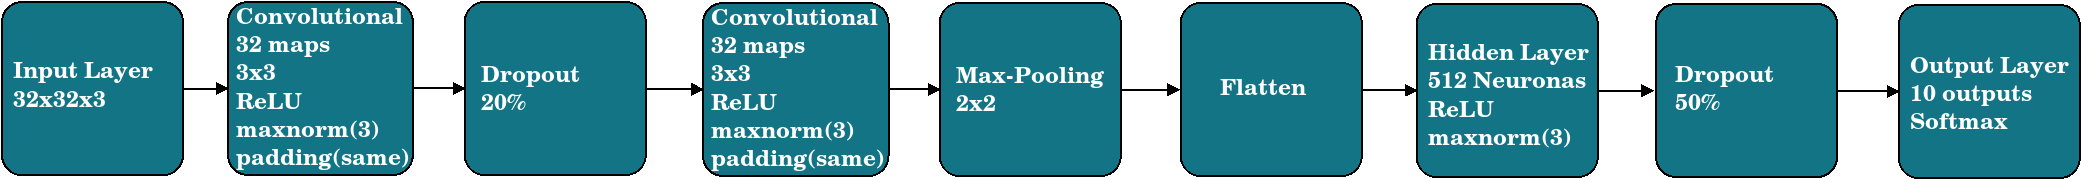

In [ ]:
# Create the model
model= Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
    
# Compile model
epochs= 25
lrate= 0.01
decay= lrate/epochs

sgd= SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy']) 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)              

<a id="section2.5"></a>
# <font color="#004D7F" size=5>2.5. Evaluación del modelo</font>

Ajustamos este modelo con 25 épocas y un tamaño de batch de 32. 

Se pone 25 con fines de obtener un resultado rápido pero pruebe con 150 épocas que sería más apropiado

In [ ]:
# Fit the model
model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=epochs,batch_size=32,verbose=2)

Epoch 1/25
1563/1563 - 14s - loss: 0.2262 - accuracy: 0.9219 - val_loss: 1.0877 - val_accuracy: 0.7080
Epoch 2/25
1563/1563 - 13s - loss: 0.2167 - accuracy: 0.9253 - val_loss: 1.0877 - val_accuracy: 0.7102
Epoch 3/25
1563/1563 - 13s - loss: 0.2090 - accuracy: 0.9283 - val_loss: 1.1041 - val_accuracy: 0.7057
Epoch 4/25
1563/1563 - 13s - loss: 0.2030 - accuracy: 0.9292 - val_loss: 1.1071 - val_accuracy: 0.7097
Epoch 5/25
1563/1563 - 13s - loss: 0.1897 - accuracy: 0.9349 - val_loss: 1.1122 - val_accuracy: 0.7094
Epoch 6/25
1563/1563 - 13s - loss: 0.1891 - accuracy: 0.9351 - val_loss: 1.0995 - val_accuracy: 0.7092
Epoch 7/25
1563/1563 - 13s - loss: 0.1813 - accuracy: 0.9383 - val_loss: 1.1459 - val_accuracy: 0.7045
Epoch 8/25
1563/1563 - 13s - loss: 0.1706 - accuracy: 0.9424 - val_loss: 1.1388 - val_accuracy: 0.7063
Epoch 9/25
1563/1563 - 13s - loss: 0.1707 - accuracy: 0.9417 - val_loss: 1.1561 - val_accuracy: 0.7043
Epoch 10/25
1563/1563 - 13s - loss: 0.1625 - accuracy: 0.9444 - val_loss:

In [ ]:
# Final evaluation of the model
score= model.evaluate(X_test,y_test, verbose=0)
print('Accuracy: %.2f' % (score[1]*100))

Accuracy: 71.07


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. CNN más profunda</font>

En esta sección, analizaremos la ampliación del tamaño y la complejidad de nuestro modelo. Podemos introducir una ronda adicional de convoluciones con muchos más mapas de características. Usaremos el mismo patrón de capas convolucional, Dropout, convolucional y de Max-Pooling.

Podemos resumir una nueva arquitectura de red como:
1. Capa de entrada convolucional, 32 mapas de $3 × 3$ y función de activación ReLU.
2. Capa Dropout al 20%.
3. Capa convolucional, 32 mapas de $3 × 3$ y una función de activación ReLU.
4. Capa Max-Pooling de $2 × 2$.
5. Capa convolucional, 64 mapas de $3 × 3$ y función de activación ReLU.
6. Capa Dropout al 20%.
7. Capa convolucional, 64 mapas de $3 × 3$ y función de activación ReLU.
8. Capa Max-Pooling de $2 × 2$.
9. Capa convolucional, 128 mapas de $3 × 3$ y función de activación ReLU.
10. Capa Dropout al 20%.
11. Capa convolucional, 128 de $3 × 3$ y función de activación ReLU.
12. Capa Max-Pooling de $2 × 2$.
13. Aplanar la capa.
14. Capa Dropout al 20%.
15. Capa totalmente conectada con 1.024 neuronas y función de activación ReLU.
16. Capa Dropout al 20%.
17. Capa totalmente conectada con 512 neuronas y función de activación ReLU.
18. Capa Dropout al 20%.
19. Capa de salida totalmente conectada con 10 unidades y función de activación Softmax.

In [ ]:
# Create the model
model= Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu', padding='same', kernel_constraint=maxnorm(3))) #1
model.add(Dropout(0.2)) #2
model.add(Conv2D(32,(3,3),activation='relu', padding='same', kernel_constraint=maxnorm(3))) #3
model.add(MaxPooling2D(pool_size=(2,2))) #4
model.add(Conv2D(64,(3,3),activation='relu', padding='same', kernel_constraint=maxnorm(3))) #5
model.add(Dropout(0.2)) #6
model.add(Conv2D(64,(3,3),activation='relu', padding='same', kernel_constraint=maxnorm(3))) #7
model.add(MaxPooling2D(pool_size=(2,2))) #8
model.add(Conv2D(128,(3,3),activation='relu', padding='same', kernel_constraint=maxnorm(3))) #9
model.add(Dropout(0.2)) #10
model.add(Conv2D(128,(3,3),activation='relu', padding='same', kernel_constraint=maxnorm(3))) #11
model.add(MaxPooling2D(pool_size=(2,2))) #12
model.add(Flatten()) #13
model.add(Dropout(0.2)) #14
model.add(Dense(1024,activation='relu', kernel_constraint=maxnorm(3))) #15
model.add(Dropout(0.2)) #16
model.add(Dense(512,activation='relu', kernel_constraint=maxnorm(3))) #17
model.add(Dropout(0.5)) #18
model.add(Dense(num_classes,activation='softmax')) #19

# Compile model
epochs= 25
lrate= 0.01
decay= lrate/epochs

sgd= SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy']) 
model.summary()

# Fit the model
model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=epochs,batch_size=32,verbose=2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
# Final evaluation of the model
score= model.evaluate(X_test,y_test, verbose=0)
print('Accuracy: %.2f' % (score[1]*100))

Accuracy: 79.17


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. Rendimiento del modelo </font>

Trabajo para vosotros:
* **Entrena para más épocas**. Es común entrenar grandes redes neuronales convolucionales durante cientos o miles de épocas. 
* **Data Augmentation**. Los objetos de la imagen varían en su posición. 
* **Topología de red más profunda**. La red más grande presentada es profunda, pero se podrían diseñar redes más grandes para el problema. 

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>